- bon accuracy
- bona descripció del que fa
- ---
- pot fer molt overfitting
- --- 
- a sobre dels arbres ha sortit, ensambled models (models machembrats entres si) fas 4/5 models i fas un promig i el meta model es el resultat. 
- d'aqui va sortir la idea de fer combinar vàris arbres de desició amb diferents parametritzacions (random forest).
    - L'arbre té un seed, un component estocastic
    - amb el random forest, fas diferents seeds per fer un promig. 
- ---
- python random forest, algo molt comú. 

### log-loss and cross-entropy

- Both metrics are indicative of how close the prediction probability is to the corresponding true values (assume one-shot-encoded classes).
- The more the predicted probabilities diverge from the actual values, the higher is the value.
- Defined as the average negative log of the predicted probabililities for the true classes.

- binary classification

$$logloss=\frac{-1}{n}\sum_{i=1}^n\,[y_i\,\ln\left(p_i\right)+\left(1-y_i\right)\,\ln\left(1-p_i\right)]$$



    - example

<div>
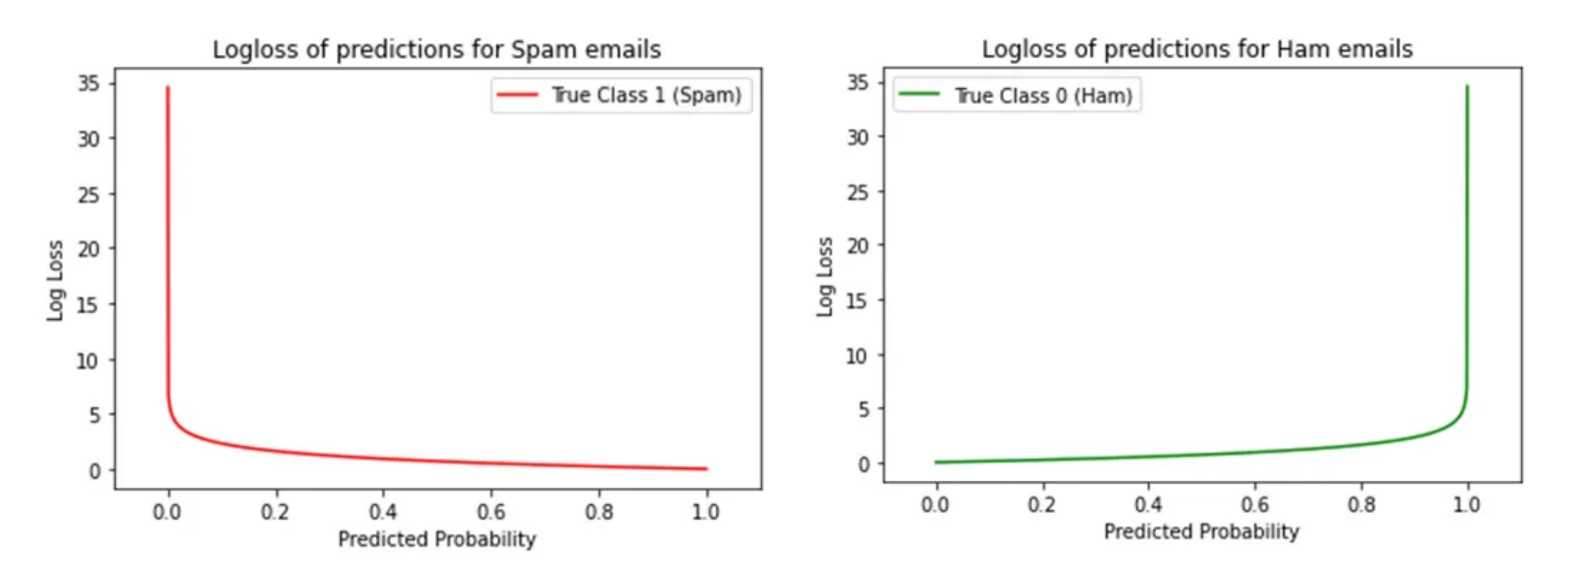
</div>

- multi-class classification

$$crossentropy=\frac{-1}{n}\sum_{i=1}^n\,y_i^{\text{one-shot}}\,\ln\left(p_i\right)$$

#### Baseline score

- it is the score (either log-loss or cross-entropy) that would correspond to a classifier based on the class prior distribution.

#### tree node splitting (impurity) criterions
- Es basa en que el $n_m$ són el número d'observacions que arriben a un node. Si n'arriben 10. Són les que s'han filtrat fins arribar allà. 
- $k$ = número de classes
- class prior: la probabilitat abans de saber res (va al metge).
    - km, de tots els m que arriben, quan són de la classe.
    - això ja és una distribució de probabilitat de com es distribueixen les classes en aquell node
    
- ---
- Exemple: tenim k = 4 classes.
    - El primer atribut separa entre 1,2 i 3,4.
    - Busquem un altre atribut que torni a separar-ho.

$$ 
n_m: \text{number of observations reaching node}\,m
\\
k: \text{number of classes}
\\
p_{mk} = \frac{n_{km}}{n_m},\; \text{class prior probabilities at node}\,m\,\text{for}\,k\in K
$$

- Gini index

$$ 
G\left(P_{mk}\right) = \sum_{k\in K}p_{mk}\,\left(1-p_{mk}\right)=\sum_{k\in K}p_{mk}-\sum_{k\in K}p_{mk}^2=1-\sum_{k\in K}p_{mk}^2
$$

- Entropy (shanon)

$$ 
H\left(P_{mk}\right) = -\sum_{k\in K}p_{mk}\,\log{p_{mk}}
$$

- gini i shanon són semblants perquè són mesures de puresa o incertesa. com més pura és una distribució, menys incertesa de que hi htrobarem. Es pot dir al revés però es mesura amb puresa i incertesa. Els dos index van en el mateix sentit + + i - -
- Això es fa servir per dir quin valor posem a cada node i quin thr fem servir per anar cap a un costat o cap a un altre. 
    - gini: suma de les probabilitats al cuadrat i 1 menys això. 
        - si la classe fos pura, de totes les classes k que tenim, si n'hi ha una que la prob és 1, i les altres 0, 1-1=0, per tant la impuresa sería 0. (mesura entre 0 i 1, que si és 0, vol dir que no hi ha impuresa i 1 màxima impuresa)
    - la de shanon, en comptes de fer el producte de les probabilititas, fa $p_{mk}$ per el logaritme d'això.
    - no està entre 0 i 1, no està normalitzada però té altres aventatges. 
    - la entropia és una mesura de incertesa, com més gran més incertesa.

- using the Shannon entropy is equivalent to minimizing the *log-loss* (or *cross-entropy*) because probabilities are constant for each class

$$
logLoss\left(P_{mk}\right)=\frac{-1}{n_m}\sum_{i=1}^{n_m}\,y_i^{\text{one-shot}}\,\log\left(p_i\right)=\frac{-1}{n_m}\sum_{k\in K}\,n_k\,\log\left(p_{mk}\right)=-\sum_{k\in K}\,p_{mk}\,\log\left(p_{mk}\right)
$$